### Object Detection using SSD (Single Shot Detection)

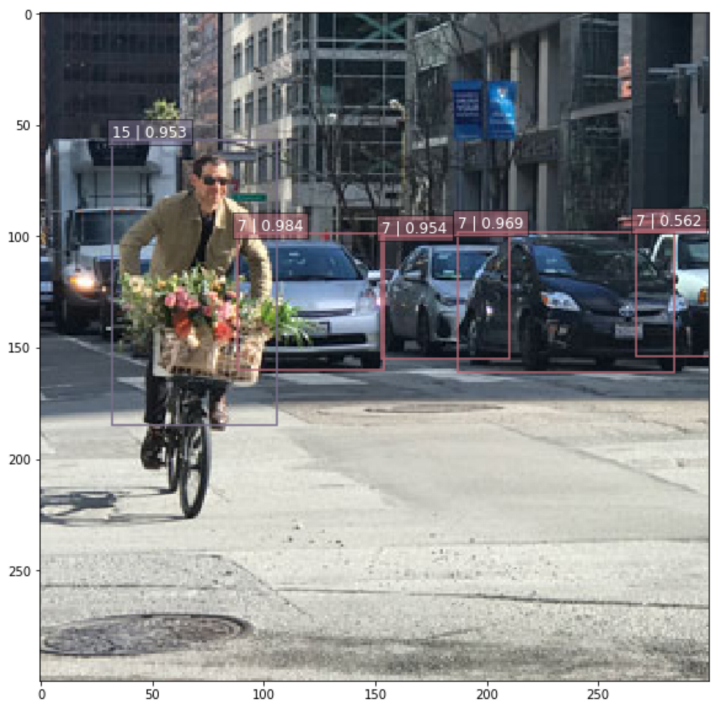

SSD is designed for object detection in real-time. Faster R-CNN uses a region proposal network to create boundary boxes and utilizes those boxes to classify objects. While it is considered the start-of-the-art in accuracy, the whole process runs at 7 frames per second. Far below what real-time processing needs. SSD speeds up the process by eliminating the need for the region proposal network. To recover the drop in accuracy, SSD applies a few improvements including multi-scale features and default boxes. These improvements allow SSD to match the Faster R-CNN’s accuracy using lower resolution images, which further pushes the speed higher. According to the following comparison, it achieves the real-time processing speed and even beats the accuracy of the Faster R-CNN. (Accuracy is measured as the mean average precision mAP: the precision of the predictions.)

The SSD object detection composes of 2 parts:

-Extract feature maps, and
-Apply convolution filters to detect objects.


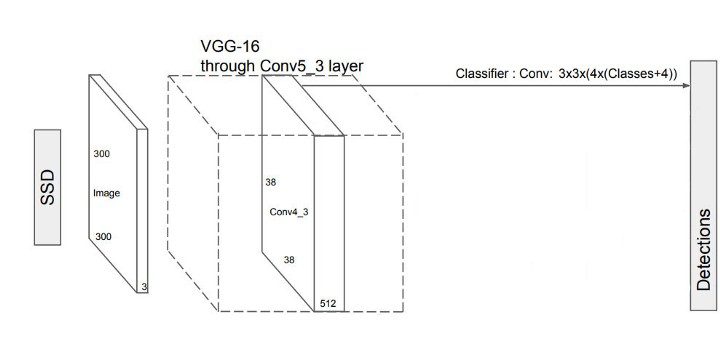

SSD uses VGG16 to extract feature maps. Then it detects objects using the Conv4_3 layer. For illustration, we draw the Conv4_3 to be 8 × 8 spatially (it should be 38 × 38). For each cell (also called location), it makes 4 object predictions.

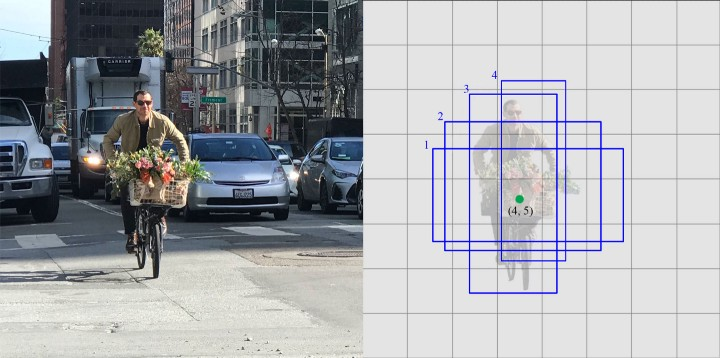

Each prediction composes of a boundary box and 21 scores for each class (one extra class for no object), and we pick the highest score as the class for the bounded object. Conv4_3 makes a total of 38 × 38 × 4 predictions: four predictions per cell regardless of the depth of the feature maps. As expected, many predictions contain no object. SSD reserves a class “0” to indicate it has no objects.

##### Importing libraries required for Object Detection using SSD.

In [1]:
from imutils.video import FPS
import numpy as np
import imutils
import cv2

C:\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Python39\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


###### Defining some constants and Classes array. Our SSD model is trained on these 21 classes.

In [2]:
use_gpu = True
live_video = False
confidence_level = 0.5
fps = FPS().start()
ret = True
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
           "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
           "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
           "sofa", "train", "tvmonitor"]

###### Defining colors array where each class is randomly assigned a color.


In [4]:
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

###### Reading the network in a variable called net using cv2.dnn.readNetFromCaffe.

In [5]:
net = cv2.dnn.readNetFromCaffe('ssd_files/MobileNetSSD_deploy.prototxt', 'ssd_files/MobileNetSSD_deploy.caffemodel')

###### If the parameter use_gpu is set to TRUE, set the backend and target to Cuda.

In [6]:
if use_gpu:
    print("[INFO] setting preferable backend and target to CUDA...")
    net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
    net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)


[INFO] setting preferable backend and target to CUDA...


###### Initialize the VideoCapture object either with 0 for live video or with the video file name.

In [18]:
print("[INFO] accessing video stream...")
if live_video:
    vs = cv2.VideoCapture(0)
else:
    vs = cv2.VideoCapture('test.mp4')

[INFO] accessing video stream...


In [19]:
#Let’s get in the infinite array and read the frames.
while ret:
    #If ret says that if the VideoCapture object is returning True, then only proceed.  
    ret, frame = vs.read()
    if ret:
        #Resize the frame and get its height and width.
        frame = imutils.resize(frame, width=400)
        (h, w) = frame.shape[:2]
        
        #Create a blob from the image, set it as input, and pass it forward through the network using cv2.blobFromImage.
        blob = cv2.dnn.blobFromImage(frame, 0.007843, (300, 300), 127.5)
        net.setInput(blob)
        detections = net.forward()
        
        # Let’s traverse in the detections we got
        for i in np.arange(0, detections.shape[2]):
            #Let’s check the confidence of each and every detection.
            confidence = detections[0, 0, i, 2]
            #If the confidence is greater than a threshold then proceed.
            if confidence > confidence_level:
                #Calculate the coordinates of the box and convert them to int.
                idx = int(detections[0, 0, i, 1])
                box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
                (startX, startY, endX, endY) = box.astype("int")
                
                #Creating text like ‘Class_name: confidence%’.
                label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
                #Drawing the rectangle around the found object.
                cv2.rectangle(frame, (startX, startY), (endX, endY), COLORS[idx], 2)
                
                #Finally putting this label onto the original frame.
                y = startY - 15 if startY - 15 > 15 else startY + 15
                cv2.putText(frame, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
        #Show final results.        
        cv2.imshow('Live detection',frame)
        
        #Break if someone hits the ESC key.
        if cv2.waitKey(1)==27:
            break
        
        #Update the fps counter.
        fps.update()
#Stop the fps counter.        
fps.stop()

In [20]:
#Printing FPS metrics.
print("[INFO] elasped time: {:.2f}".format(fps.elapsed()))
print("[INFO] approx. FPS: {:.2f}".format(fps.fps()))

[INFO] elasped time: 1076.00
[INFO] approx. FPS: 0.00


### Copy this code into a python file and run it for the result.